In [206]:
from neo4j import GraphDatabase
import pandas as pd
import numpy as np

In [207]:
uri = "bolt://34.101.192.24:7687"
username = "neo4j"
password = "unej1234"

driver = GraphDatabase.driver(uri, auth=(username, password))

In [208]:
def extract_node_properties():
    with driver.session() as session:
        # Cypher query to fetch node properties
        query = """
        MATCH (n)
        RETURN n.Vector AS vector, n.label AS label, labels(n) AS kelas, n.abstract AS keterangan
        """
        result = session.run(query)
        # Extract properties and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        return df


In [209]:
node_df = extract_node_properties()
cleaned_kelas = node_df['kelas'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
node_df['kelas'] = cleaned_kelas
node_df

,vector,label,kelas,keterangan
0,"[0.03639092668890953, -0.024370986968278885, -...",Metalaxyl,[Fungisida],Metalaxyl adalah sejenis fungisida yang diguna...
1,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],"Penyakit gosong bulir padi, juga dikenal sebag..."
2,"[0.032646406441926956, -0.04352227970957756, 0...",Laba laba,[Biologis],Laba-laba adalah predator umum yang dapat mema...
3,"[0.036355093121528625, 0.043446771800518036, 0...",Trichogramm,[Biologis],Trichogramma atau parasitoid terkait hadir ada...
4,"[0.036346133798360825, -0.03959878906607628, -...",Acidovorax avenae subsp. avenae,[PatogenPadi],Acidovorax avenae subsp. avenae adalah bakteri...
...,...,...,...,...
138,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi],Penggerek batang kuning merupakan jenis serang...
139,"[0.03915003314614296, -0.04633839428424835, 0....",Klorpiris,[Pestisida],Klorpirifos adalah insektisida organofosfat. K...
140,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi],Rayap dapat menyerang tanaman di semua tahap p...
141,"[0.03916794806718826, 0.019752727821469307, 0....",Daun berkarat,[Gejala],Daun berkarat (pastula) berwarna kuning hingga...


In [210]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
            MATCH (n)-[r]->(m)
            RETURN n.Vector AS source_vector, n.label AS source_label, labels(n) AS source_class, 
                type(r) AS relationship_type,
                m.Vector AS target_vector, m.label AS target_label, labels(m) AS target_class
        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.03818255290389061, -0.015258912928402424, -...",Bulir terdapat bercak,[Gejala]
1,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.03753756731748581, 0.005460740067064762, -0...",Bulir pecah,[Gejala]
2,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],memilikiGejala,"[0.03612148016691208, 0.0048484764993190765, 0...",Bulir berubah warna,[Gejala]
3,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],terkenaPatogen,"[0.03752860799431801, 0.022415179759263992, 0....",Tilletia barclayana,[PatogenPadi]
4,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[PenyakitPadi],diberikanFungisida,"[0.03760923072695732, -0.030174778774380684, 0...",Pyraclostrobin,[Fungisida]
...,...,...,...,...,...,...,...
249,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi],memilikiGejala,"[0.038021307438611984, -0.010079000145196915, ...",Malai terdapat bercak,[Gejala]
250,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[HamaPadi],memilikiGejala,"[0.033894460648298264, -0.014245453290641308, ...",Daun terdapat bercak,[Gejala]
251,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi],memilikiGejala,"[0.03758235648274422, 0.02068854123353958, 0.0...",Batang rapuh,[Gejala]
252,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[HamaPadi],memilikiGejala,"[0.03786005824804306, -0.004899086430668831, 0...",Akar berlubang,[Gejala]


In [211]:
def extract_node_properties_and_relationships():
    with driver.session() as session:
        # Cypher query to fetch node properties and relationships
        query = """
        MATCH (n)-[r]->(m)
            WHERE any(label IN labels(n) WHERE label IN ['Gejala', 'PenyakitPadi', 'HamaPadi']) 
            AND any(label IN labels(m) WHERE label IN ['Gejala', 'PenyakitPadi', 'HamaPadi'])
        RETURN 
        n.Vector AS source_vector, n.label AS source_label, labels(m) AS source_class, 
        type(r) AS relationship_type,
        m.Vector AS target_vector, m.label AS target_label, labels(n) AS target_class

        """
        result = session.run(query)
        # Extract properties and relationships and store in DataFrame
        df = pd.DataFrame([record.values() for record in result], columns=result.keys())
        # Clean labels
        df['source_class'] = df['source_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        df['target_class'] = df['target_class'].apply(lambda entry: [item for item in entry if item not in ["Resource", "NamedIndividual"]])
        return df

# Call the function to extract node properties and relationships
Rice_KG_df = extract_node_properties_and_relationships()

# Print the DataFrame
Rice_KG_df


,source_vector,source_label,source_class,relationship_type,target_vector,target_label,target_class
0,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[Gejala],memilikiGejala,"[0.03818255290389061, -0.015258912928402424, -...",Bulir terdapat bercak,[PenyakitPadi]
1,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[Gejala],memilikiGejala,"[0.03753756731748581, 0.005460740067064762, -0...",Bulir pecah,[PenyakitPadi]
2,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[Gejala],memilikiGejala,"[0.03612148016691208, 0.0048484764993190765, 0...",Bulir berubah warna,[PenyakitPadi]
3,"[0.03452454134821892, 0.04011273384094238, -0....",Gosong bulir,[Gejala],memilikiGejala,"[0.03656195476651192, 0.02377898246049881, 0.0...",Bulir mengalami kerusakan,[PenyakitPadi]
4,"[0.03643496334552765, -0.020186755806207657, -...",Garis Merah,[Gejala],memilikiGejala,"[0.038021307438611984, -0.010079000145196915, ...",Malai terdapat bercak,[PenyakitPadi]
...,...,...,...,...,...,...,...
131,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[Gejala],memilikiGejala,"[0.038021307438611984, -0.010079000145196915, ...",Malai terdapat bercak,[HamaPadi]
132,"[0.03919482231140137, -0.031110592186450958, 0...",Penggerek Batang Kuning,[Gejala],memilikiGejala,"[0.033894460648298264, -0.014245453290641308, ...",Daun terdapat bercak,[HamaPadi]
133,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[Gejala],memilikiGejala,"[0.03758235648274422, 0.02068854123353958, 0.0...",Batang rapuh,[HamaPadi]
134,"[0.03914107382297516, -0.029383953660726547, -...",Rayap,[Gejala],memilikiGejala,"[0.03786005824804306, -0.004899086430668831, 0...",Akar berlubang,[HamaPadi]


# RANDOM FOREST

In [212]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Convert source and target vectors to numpy arrays
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())

# Concatenate source and target vectors as features
X = np.concatenate([source_vectors, target_vectors], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Define the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=1)

# Perform cross-validation with multiple metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}
rf_cv_results = cross_validate(rf_clf, X, y, cv=5, scoring=scoring)

# Print the cross-validation results
print("Accuracy scores:", rf_cv_results['test_accuracy'])
print("Mean accuracy:", np.mean(rf_cv_results['test_accuracy']))
print("Precision scores:", rf_cv_results['test_precision'])
print("Mean precision:", np.mean(rf_cv_results['test_precision']))
print("Recall scores:", rf_cv_results['test_recall'])
print("Mean recall:", np.mean(rf_cv_results['test_recall']))
print("F1 scores:", rf_cv_results['test_f1'])
print("Mean F1 score:", np.mean(rf_cv_results['test_f1']))


Accuracy scores: [0.85714286 0.92592593 0.85185185 0.66666667 0.85185185]
Mean accuracy: 0.8306878306878307
Precision scores: [0.85714286 0.85733882 0.85185185 0.83333333 0.89801396]
Mean precision: 0.8595361637229593
Recall scores: [0.85714286 0.92592593 0.85185185 0.66666667 0.85185185]
Mean recall: 0.8306878306878307
F1 scores: [0.85714286 0.89031339 0.85185185 0.74074074 0.86728395]
Mean F1 score: 0.8414665581332248


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [213]:
###     DECISION TREE   ###

from sklearn.tree import DecisionTreeClassifier

# Convert source and target vectors to numpy arrays
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())

# Concatenate source and target vectors as features
X = np.concatenate([source_vectors, target_vectors], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])


# Perform cross-validation with multiple metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}
dt_cv_results = cross_validate(DecisionTreeClassifier(), X, y, cv=5, scoring=scoring)

# Print the cross-validation results
print("Accuracy scores:", dt_cv_results['test_accuracy'])
print("Mean accuracy:", np.mean(dt_cv_results['test_accuracy']))
print("Precision scores:", dt_cv_results['test_precision'])
print("Mean precision:", np.mean(dt_cv_results['test_precision']))
print("Recall scores:", dt_cv_results['test_recall'])
print("Mean recall:", np.mean(dt_cv_results['test_recall']))
print("F1 scores:", dt_cv_results['test_f1'])
print("Mean F1 score:", np.mean(dt_cv_results['test_f1']))

Accuracy scores: [0.89285714 0.88888889 0.85185185 0.59259259 0.85185185]
Mean accuracy: 0.8156084656084657
Precision scores: [0.82671958 0.9058642  0.85185185 0.82304527 0.89801396]
Mean precision: 0.861098969915395
Recall scores: [0.89285714 0.88888889 0.85185185 0.59259259 0.85185185]
Mean recall: 0.8156084656084657
F1 scores: [0.85851648 0.89392794 0.85185185 0.68906115 0.86728395]
Mean F1 score: 0.8321282763420083


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

# Neural Network

In [214]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Concatenate source and target vectors as features
X = np.concatenate([Rice_KG_df['source_vector'].values.tolist(), Rice_KG_df['target_vector'].values.tolist()], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, nn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", nn_accuracy)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate classification report
print(classification_report(y_test, y_pred_classes, labels=np.arange(len(label_encoder.classes_)), target_names=label_encoder.classes_))


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.2921 - loss: 1.7881    
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.9540 - loss: 1.7370
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.9693 - loss: 1.6861
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.9699 - loss: 1.6234
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.9376 - loss: 1.5495
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9384 - loss: 1.4471
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.9647 - loss: 1.3041
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.9555 - loss: 1.1429
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.9597 - loss: 0.9542
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9461 - loss: 0.7657 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9336 - loss: 0.6062
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.9518 -

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/

In [215]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
# Calculate precision for each class
precision_per_class = cm.diagonal() / cm.sum(axis=0)

# Calculate recall for each class
recall_per_class = cm.diagonal() / cm.sum(axis=1)

# Overall precision and recall
nn_precision = precision_score(y_test, y_pred_classes, average='weighted')
nn_recall = recall_score(y_test, y_pred_classes, average='weighted')
nn_f1 = f1_score(y_test, y_pred_classes, average='weighted')


print("Overall Precision:", nn_precision)
print("Overall Recall:", nn_recall)
print("Overall F1-Score:", nn_f1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
Overall Precision: 0.7287328970850684
Overall Recall: 0.8536585365853658
Overall F1-Score: 0.7862644415917843


/var/folders/tq/8dxrnbkd5bx737ykn8j5w4j40000gn/T/ipykernel_35347/1536916917.py:7: RuntimeWarning: invalid value encountered in divide
  precision_per_class = cm.diagonal() / cm.sum(axis=0)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

# Concatenate source and target vectors as features
X = np.concatenate([Rice_KG_df['source_vector'].values.tolist(), Rice_KG_df['target_vector'].values.tolist()], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Reshape the input data to be suitable for a 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, cnn_accuracy = model.evaluate(X_test_cnn, y_test)
print("Accuracy:", cnn_accuracy)

# Make predictions
y_pred_cnn = model.predict(X_test_cnn)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)

# Ensure the correct number of classes in the classification report
labels = np.arange(len(label_encoder.classes_))

# Generate classification report
print(classification_report(y_test, y_pred_classes_cnn, labels=labels, target_names=label_encoder.classes_))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes_cnn, labels=labels)

# Calculate precision for each class
precision_per_class = cm.diagonal() / cm.sum(axis=0)

# Calculate recall for each class
recall_per_class = cm.diagonal() / cm.sum(axis=1)

# Overall precision, recall, and F1-score
cnn_precision = precision_score(y_test, y_pred_classes_cnn, average='weighted')
cnn_recall = recall_score(y_test, y_pred_classes_cnn, average='weighted')
cnn_f1 = f1_score(y_test, y_pred_classes_cnn, average='weighted')

print("Overall Precision:", cnn_precision)
print("Overall Recall:", cnn_recall)
print("Overall F1-Score:", cnn_f1)


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5651 - loss: 1.7708      
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9495 - loss: 1.6353
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9232 - loss: 1.4007 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.8861 - loss: 0.9975
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.9557 - loss: 0.4858
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.9596 - loss: 0.2725
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9501 - loss: 0.3630
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.9264 - loss: 0.4951
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.9323 - loss: 0.3345
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.9673 - loss: 0.2330
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9128 - loss: 0.3889
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9478 - l

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/

In [217]:
#RNN

from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

# Function to safely evaluate a string representation of a list
def safe_eval(x):
    if isinstance(x, str):
        return ast.literal_eval(x)
    return x

# Apply the safe_eval function to convert vector columns from string to list (if necessary)
Rice_KG_df['source_vector'] = Rice_KG_df['source_vector'].apply(safe_eval)
Rice_KG_df['target_vector'] = Rice_KG_df['target_vector'].apply(safe_eval)

# Concatenate source and target vectors as features
source_vectors = np.array(Rice_KG_df['source_vector'].tolist())
target_vectors = np.array(Rice_KG_df['target_vector'].tolist())
X = np.concatenate([source_vectors, target_vectors], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Rice_KG_df['relationship_type'])

# Reshape data for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine the number of unique classes
num_classes = len(np.unique(y))

# Build the RNN model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer-encoded labels
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluate the model
loss, rnn_accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", rnn_accuracy)

y_pred_rnn = model.predict(X_test)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)

labels = np.arange(len(label_encoder.classes_))

print(classification_report(y_test, y_pred_classes_rnn, labels=labels, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_classes_rnn, labels=labels)

precision_per_class = cm.diagonal() / cm.sum(axis=0)
recall_per_class = cm.diagonal() / cm.sum(axis=1)

rnn_precision = precision_score(y_test, y_pred_classes_rnn, average='weighted')
rnn_recall = recall_score(y_test, y_pred_classes_rnn, average='weighted')
rnn_f1 = f1_score(y_test, y_pred_classes_rnn, average='weighted')

print("Overall Precision:", rnn_precision)
print("Overall Recall:", rnn_recall)
print("Overall F1-Score:", rnn_f1)



Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.4530 - loss: 1.7875    
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9258 - loss: 1.7591
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.9181 - loss: 1.7305
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9045 - loss: 1.6986
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9152 - loss: 1.6608
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.9191 - loss: 1.6198
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9022 - loss: 1.5771
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9022 - loss: 1.5287
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9461 - loss: 1.4527
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9103 - loss: 1.4059
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9580 - loss: 1.3134
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9457 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/

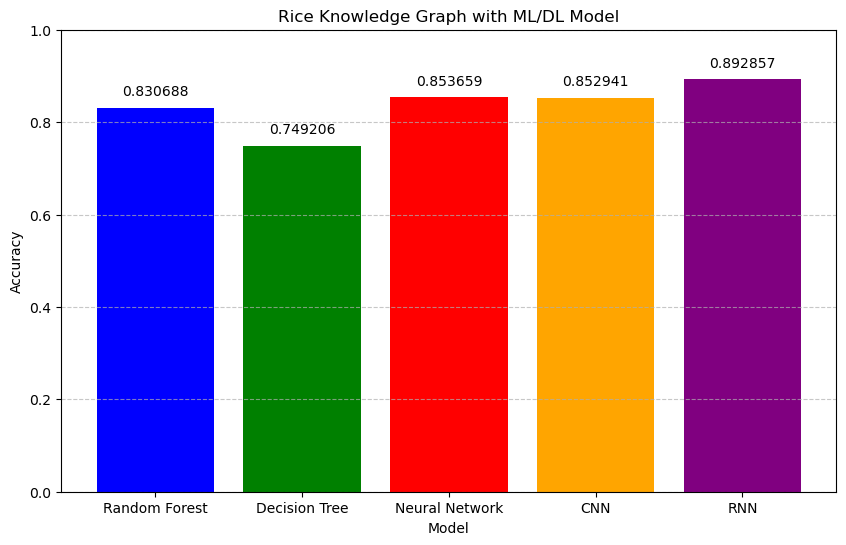

In [218]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores of four other models stored in variables

# Define the model names
model_names = ['Random Forest', 'Decision Tree', 'Neural Network', 'CNN', 'RNN']

# Define the accuracy scores
accuracy_scores = [np.mean(rf_cv_results['test_accuracy']), np.mean(dt_accuracy), nn_accuracy, cnn_accuracy, rnn_accuracy]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Rice Knowledge Graph with ML/DL Model')
plt.ylim(0, 1)  # Set the y-axis limits to ensure all bars are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy text on top of each bar
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
             f'{accuracy:.6f}', 
             ha='center', va='bottom')

plt.show()


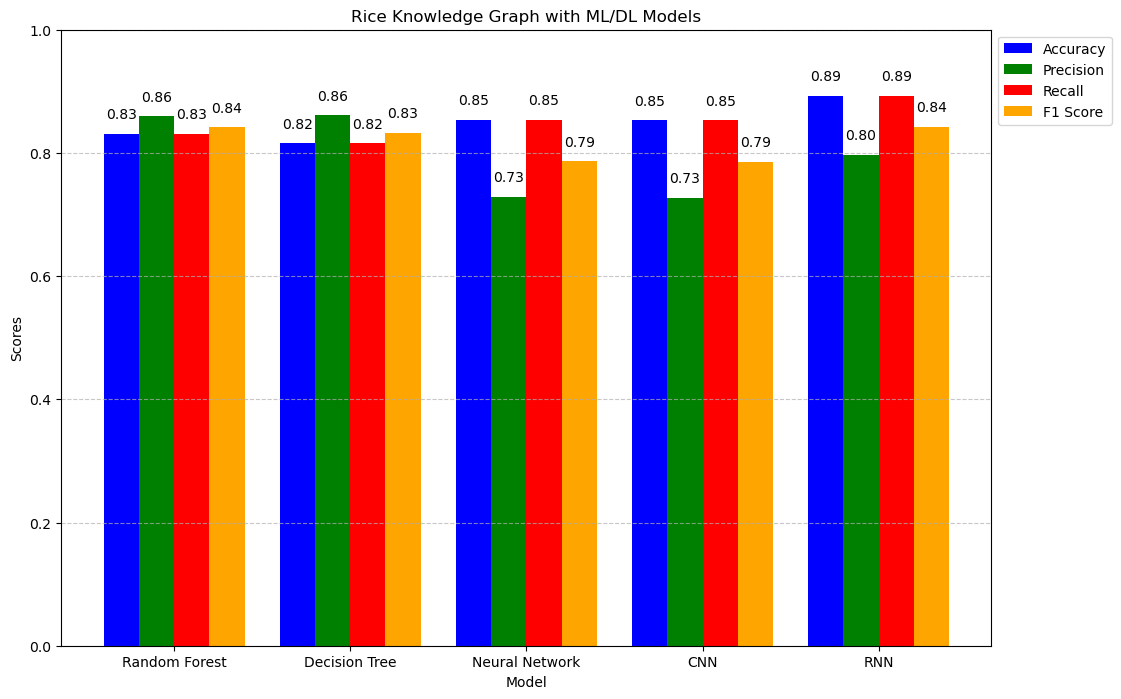

In [219]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the scores of models stored in variables
# Define the model names
model_names = ['Random Forest', 'Decision Tree', 'Neural Network', 'CNN', 'RNN']

# Define the accuracy, precision, recall, and f1 scores
accuracy_scores = [np.mean(rf_cv_results['test_accuracy']), np.mean(dt_cv_results['test_accuracy']), nn_accuracy, cnn_accuracy, rnn_accuracy]
precision_scores = [np.mean(rf_cv_results['test_precision']), np.mean(dt_cv_results['test_precision']), nn_precision, cnn_precision, rnn_precision]
recall_scores = [np.mean(rf_cv_results['test_recall']), np.mean(dt_cv_results['test_recall']), nn_recall, cnn_recall, rnn_recall]
f1_scores = [np.mean(rf_cv_results['test_f1']), np.mean(dt_cv_results['test_f1']), nn_f1, cnn_f1, rnn_f1]

# Set bar width and positions
bar_width = 0.2
index = np.arange(len(model_names))

# Plot the bar chart
plt.figure(figsize=(12, 8))

# Create bars for each metric
bars1 = plt.bar(index - bar_width*1.5, accuracy_scores, bar_width, label='Accuracy', color='blue')
bars2 = plt.bar(index - bar_width/2, precision_scores, bar_width, label='Precision', color='green')
bars3 = plt.bar(index + bar_width/2, recall_scores, bar_width, label='Recall', color='red')
bars4 = plt.bar(index + bar_width*1.5, f1_scores, bar_width, label='F1 Score', color='orange')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Rice Knowledge Graph with ML/DL Models')
plt.xticks(index, model_names)
plt.ylim(0, 1)  # Set the y-axis limits to ensure all bars are visible
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add text labels
def add_labels(bars, scores):
    for bar, score in zip(bars, scores):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
                 f'{score:.2f}', 
                 ha='center', va='bottom')

add_labels(bars1, accuracy_scores)
add_labels(bars2, precision_scores)
add_labels(bars3, recall_scores)
add_labels(bars4, f1_scores)

plt.show()
